# Data Visualization

Load unprocessed data

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
os.chdir("C:/Users/TonyG/Documents/GitHub/bads/kaggle") # Tony
#os.chdir("C:/Users/erin-/Documents/bads/kaggle") # Erin
#os.chdir("C:/Users/gotschat/Documents") # Server
data = pd.read_csv("./data/BADS_WS2021_known.csv", sep = ",", index_col='order_item_id') # Known data set

data_u = pd.read_csv("./data/BADS_WS2021_unknown.csv", sep = ",", index_col='order_item_id') # Unknown data set

During our initial analysis we found that some sizes where encoded as upper cases in the unknown data set and as lower cases in the known data set. Since those sizes where otherwise identical, e.g. *XL* and *xl* we convert all sizes to lower cases to avoid seperation of identical categories.

In [151]:
data["item_size"] = data["item_size"].str.lower()
data_u["item_size"] = data_u["item_size"].str.lower()

Convert *item_size*, *item_color*, *user_title* and *user_state* to categories, *return* to bool and finally *order_date*, *user_reg_date*, *delivery_date* and *user_dob* to datetime.

In [152]:
filter_date = ["order_date", "user_reg_date", "delivery_date", "user_dob"] # filter for variables to be changed to datetime
data[filter_date] = data[filter_date].apply(pd.to_datetime,format = "%Y-%m-%d") # change variables type to datetime

filter_cat = ["item_size", "item_color", "user_title", "user_state"] # filter for variables to be changed to category
data[filter_cat] = data[filter_cat].astype("category") # change variables type to category

data["return"] = data["return"].astype(bool) # Change return type to bool

# Repeat exercise for unknown data set
data_u[filter_date] = data_u[filter_date].apply(pd.to_datetime,format = "%Y-%m-%d")
data_u[filter_cat] = data_u[filter_cat].astype("category")

First, let us look at categories for the variables *item_size* and *item_color* that only appear in the unknown or in the known data set.

In [153]:
union_size = data["item_size"].cat.categories.sort_values().intersection(data_u["item_size"].cat.categories.sort_values()) # Get the union of all sizes from both datasets
union_col = data["item_color"].cat.categories.sort_values().intersection(data_u["item_color"].cat.categories.sort_values()) # Get the union of all colors from both datasets

difference_known_size = data["item_size"].cat.categories.sort_values().difference(union_size) # Item sizes that don't appear in the unknown data set
difference_known_color = data["item_color"].cat.categories.sort_values().difference(union_col) # Item colors that don't appear in the unknown data set

difference_unknown_size = data_u["item_size"].cat.categories.sort_values().difference(union_size) # Item sizes that don't appear in the known data set
difference_unknown_color = data_u["item_color"].cat.categories.sort_values().difference(union_col) # Item colors that don't appear in the known data set

Further insight into the sizes and colors that only appear in the known data set.

In [154]:
print(difference_known_size) # Sizes not in unknown
print(difference_known_color) # Colors not in unknown

# Observations per sizes category
obs_diff_known_siz = data.loc[data["item_size"].isin(difference_known_size), "item_size"].value_counts()

# Observations per color category
obs_diff_known_col = data.loc[data["item_color"].isin(difference_known_color), "item_color"].value_counts()
print(obs_diff_known_col[obs_diff_known_col > 0]), print(obs_diff_known_siz[obs_diff_known_siz > 0])

Index(['105', '2+', '3132', '3634', '3834', '4034', '49', '58', '80', '84'], dtype='object')
Index(['amethyst', 'apricot', 'avocado', 'baltic blue', 'caramel', 'curled',
       'currant purple', 'dark grey', 'mint', 'opal'],
      dtype='object')
mint              137
dark grey          39
baltic blue        20
curled             13
apricot            10
caramel            10
currant purple      7
amethyst            5
avocado             4
opal                2
Name: item_color, dtype: int64
58      5
80      2
2+      2
3634    1
3132    1
49      1
84      1
4034    1
3834    1
105     1
Name: item_size, dtype: int64


(None, None)

Same for the unknown colors and sizes.

In [155]:
print(difference_unknown_size) # Sizes not in unknown
print(difference_unknown_color) # Colors not in unknown

# Observations per sizes category
obs_diff_unknown_siz = data_u.loc[data_u["item_size"].isin(difference_unknown_size), "item_size"].value_counts()

# Observations per color category
obs_diff_unknown_col = data_u.loc[data_u["item_color"].isin(difference_unknown_color), "item_color"].value_counts()
print(obs_diff_unknown_col[obs_diff_unknown_col > 0]), print(obs_diff_unknown_siz[obs_diff_unknown_siz > 0])

Index(['110', '122', '4232', '95'], dtype='object')
Index([], dtype='object')
Series([], Name: item_color, dtype: int64)
122     3
4232    1
110     1
95      1
Name: item_size, dtype: int64


(None, None)

Display categories from *item_size* and *item_color* which have a return ration of either 0 or 1 and the respective number of observations for those cases.

In [204]:
tab_size = pd.crosstab(data.item_size, data["return"]).apply(lambda r: r/r.sum(), axis=1)
ratios_size = (tab_size[1]- tab_size[0])[(tab_size[1] - tab_size[0]) == 1]

tab_color = pd.crosstab(data.item_color, data["return"]).apply(lambda r: r/r.sum(), axis=1)
ratios_col = (tab_color[1]- tab_color[0])[(tab_color[1] - tab_color[0]) == 1]

print(ratios_size, ratios_col)

item_size
12+     1.0
2+      1.0
3132    1.0
4034    1.0
80      1.0
84      1.0
dtype: float64 Series([], dtype: float64)


Now display the number of observations for those categories. Since *item_color* doesn't have such a category only the observations for *item_size* are printed.

In [203]:
sizes_obs = data.loc[data.item_size.isin(ratios_size.index), "item_size"].value_counts()
sizes_obs[sizes_obs > 0]

80      2
2+      2
4034    1
12+     1
3132    1
84      1
Name: item_size, dtype: int64

We create plots for the variable *item_size* and *item_color* which depicts the ratio of returned items falling into the respective category. The plots are ordered in descending order regarding the number of items that have the respective category.

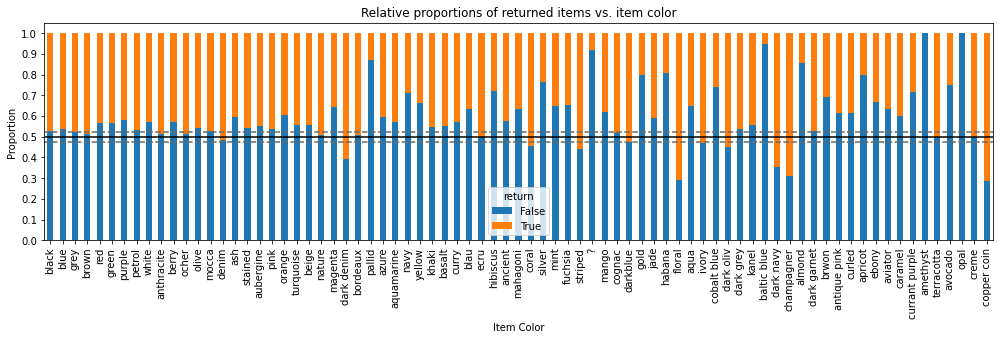

In [157]:
color_rel = data.groupby(['return', 'item_color']).size().reset_index() # Count False/True per category
color_rel = color_rel.pivot(columns='return', index='item_color', values=0)  # coerse to smaller data frame
color_rel = color_rel.reindex(color_rel.iloc[:, 0].sort_values(ascending = False).index) # Sort by number of occurences of the category
color_rel = color_rel.div(np.sum(color_rel, axis = 1).values, axis = 0) # convert absolute number to proportions

plot_1 = color_rel.plot(kind='bar', stacked = True, figsize = (17, 4), title = "Relative proportions of returned items vs. item color",
              xlabel = "Item Color", ylabel = "Proportion", yticks = np.arange(0, 1.1, step = 0.1))
plot_1.axhline(y = .5, color = "black")
plot_1.axhline(y = 0.475, color = "dimgrey", linestyle = "--")
plot_1.axhline(y = 0.525, color = "dimgrey", linestyle = "--"); # plot 

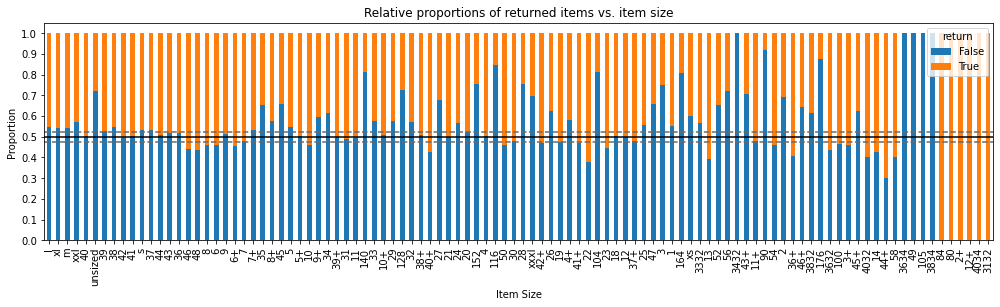

In [158]:
size_rel = data.groupby(['return', 'item_size']).size().reset_index() # Count False/True per category
size_rel = size_rel.pivot(columns='return', index='item_size', values=0)  # coerse to smaller data frame
size_rel = size_rel.reindex(size_rel.iloc[:, 0].sort_values(ascending = False).index) # Sort by number of occurences of the category
size_rel = size_rel.div(np.sum(size_rel, axis = 1).values, axis = 0) # convert absolute number to proportions

plot_2 = size_rel.plot(kind='bar', stacked = True, figsize = (17, 4), title = "Relative proportions of returned items vs. item size",
              xlabel = "Item Size", ylabel = "Proportion", yticks = np.arange(0, 1.1, step = 0.1))
plot_2.axhline(y = .5, color = "black")
plot_2.axhline(y = 0.475, color = "dimgrey", linestyle = "--")
plot_2.axhline(y = 0.525, color = "dimgrey", linestyle = "--"); # plot 

Next we plot the absolute number of returned/not returned items for *item_size* and *item_color*

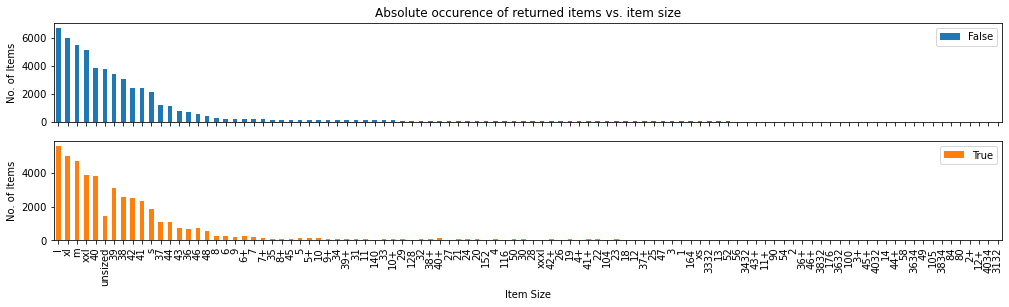

In [159]:
size_abs = data.groupby(['return', 'item_size']).size().reset_index().pivot(columns='return', index='item_size', values=0) # Count False/True per category and coerse to smaller data frame 
size_abs = size_abs.reindex(size_abs.iloc[:, 0].sort_values(ascending = False).index) # Sort by number of occurences of the category
size_abs.plot(kind='bar', subplots = True, figsize = (17, 4), title = ["Absolute occurence of returned items vs. item size", ""],
              xlabel = "Item Size", ylabel = "No. of Items");

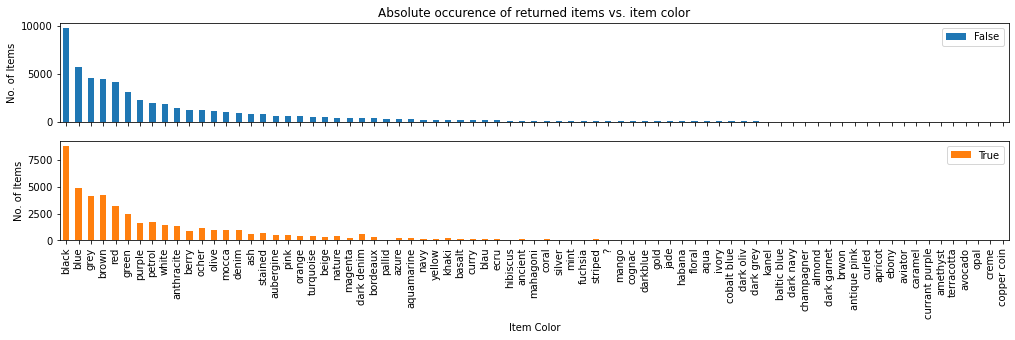

In [160]:
color_abs = data.groupby(['return', 'item_color']).size().reset_index().pivot(columns='return', index='item_color', values=0) # Count False/True per category and coerse to smaller data frame 
color_abs = color_abs.reindex(color_abs.iloc[:, 0].sort_values(ascending = False).index) # Sort by number of occurences of the category
color_abs.plot(kind='bar', subplots = True, figsize = (17, 4), title = ["Absolute occurence of returned items vs. item color", ""],
              xlabel = "Item Color", ylabel = "No. of Items");

Since one can assume that the item price plays an important role in the customer's decision process whether he or she returns the item, we might also look at the distribution of *item_price* grouped by the variable *return*.

Text(0.5, 1.0, '')

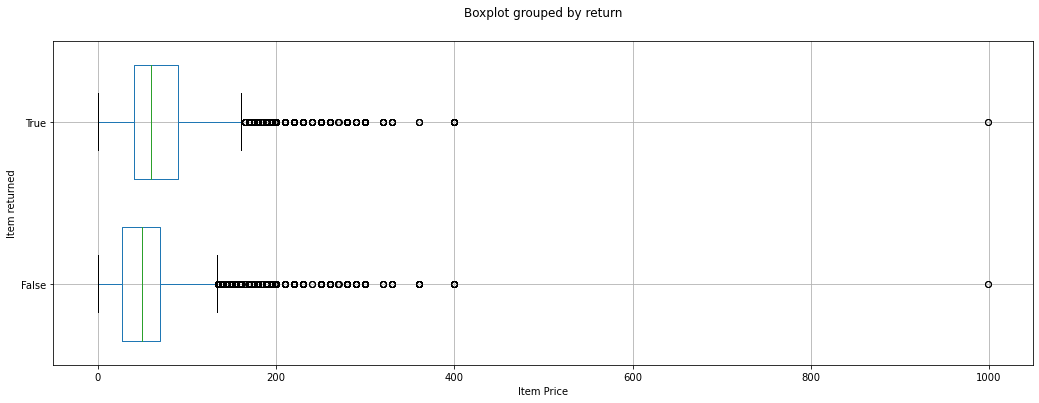

In [161]:
plot_price = data.loc[:, ["return", "item_price"]].boxplot(by = "return", figsize = (17, 6),
                                                           vert = False, widths = 0.7)
plot_price.set_xlabel("Item Price")
plot_price.set_ylabel("Item returned")
plot_price.set_title("")

<AxesSubplot:xlabel='user_title', ylabel='item_price'>

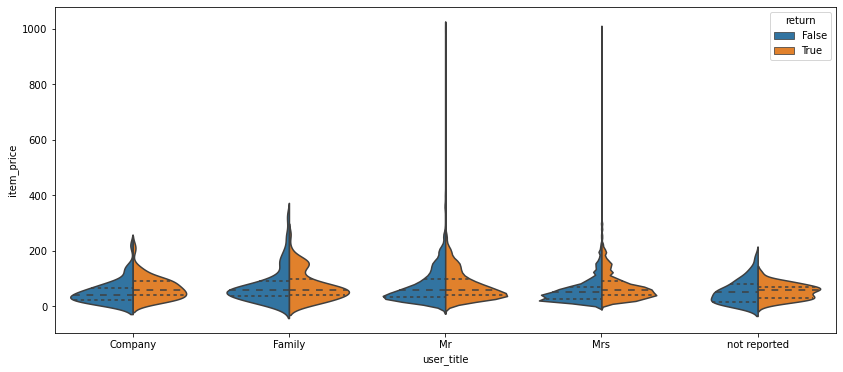

<Figure size 432x288 with 0 Axes>

In [243]:
fig, ax = plt.subplots(figsize= (14,6))
plt.figure()
sns.violinplot(ax = ax, x = "user_title", y = "item_price", hue='return',
                           split=True, inner="quart",
                           data= data)